In [ ]:
#imports
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning, making the job_posting_date a datetime object
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])



df['job_skills'] = df['job_skills'].apply(lambda x :ast.literal_eval(x) if pd.notna(x) else x)

In [90]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month

df_DS_exploded = df_DS.explode('job_skills')

df_DS_pivot = df_DS_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()

df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]

df_DS_pivot = df_DS_pivot.drop('Total')



In [91]:
df_DS_pivot = df_DS_pivot.reset_index()


In [92]:
df_DS_pivot['month'] = df_DS_pivot['job_posted_month_no'].apply(lambda month: pd.to_datetime(month, format='%m').strftime("%b"))
df_DS_pivot.drop(columns='job_posted_month_no', inplace=True)

<Axes: xlabel='month'>

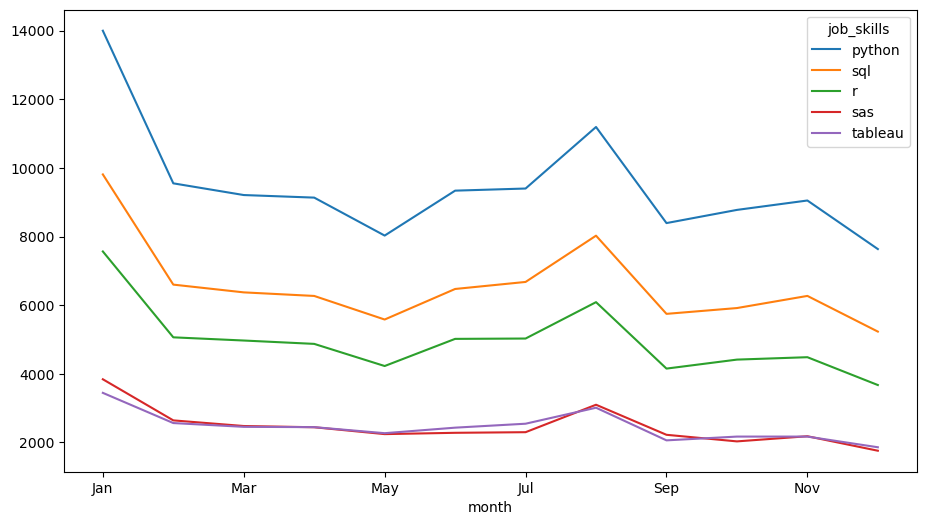

In [93]:

df_DS_pivot.set_index('month', inplace=True)    
df_DS_pivot.iloc[:, :5].plot(kind='line', figsize=(11,6))
